# Combined Dataset - Feed Forward Neural Network
## Essentia Best Overall + openSMILE GeMAPS Featureset

## Import relevant libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torcheval.metrics import R2Score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math

import sys

## Neural Network Training

### Import annotations dataset

In [2]:
df_annotations = pd.read_csv('../../data/combined/annotations/combined_static_annotations.csv')
df_annotations

song_id  valence_mean_mapped  arousal_mean_mapped
0         deam_2               -0.475               -0.500
1         deam_3               -0.375               -0.425
2         deam_4                0.175                0.125
3         deam_5               -0.150                0.075
4         deam_7                0.200                0.350
...          ...                  ...                  ...
2506   pmemo_993                0.525                0.725
2507   pmemo_996                0.125                0.750
2508   pmemo_997                0.325                0.425
2509   pmemo_999                0.550                0.750
2510  pmemo_1000                0.150                0.325

[2511 rows x 3 columns]

### Import the featureset

This is where you should change between normalised and standardised, and untouched featuresets!

In [3]:
df_essentia_best_overall_opensmile_gemaps_features = pd.read_csv('../../data/combined/features/normalised_essentia_best_overall_opensmile_gemaps_features.csv')

df_essentia_best_overall_opensmile_gemaps_features

song_id  lowlevel.melbands_kurtosis.mean  \
0         deam_2                         0.023745   
1         deam_3                         0.082083   
2         deam_4                         0.018062   
3         deam_5                         0.016018   
4         deam_7                         0.107675   
...          ...                              ...   
2506   pmemo_993                         0.019068   
2507   pmemo_996                         0.037488   
2508   pmemo_997                         0.015505   
2509   pmemo_999                         0.020577   
2510  pmemo_1000                         0.010435   

      lowlevel.melbands_skewness.mean  lowlevel.spectral_energy.mean  \
0                            0.224209                       0.054855   
1                            0.348482                       0.211289   
2                            0.213582                       0.084731   
3                            0.181322                       0.041096   
4                            0.349349                       0.197274   
...                               ...                            ...   
2506                         0.184507                       0.069237   
2507                         0.213255                       0.067479   
2508                         0.192911                       0.072763   
2509                         0.215383                       0.087517   
2510                         0.178306                       0.061554   

      tonal.chords_strength.mean  tonal.hpcp_entropy.mean  \
0                       0.368995                 0.631265   
1                       0.378784                 0.543954   
2                       0.622282                 0.554446   
3                       0.612692                 0.395875   
4                       0.171114                 0.602087   
...                          ...                      ...   
2506                    0.609474                 0.543563   
2507                    0.606481                 0.597607   
2508                    0.247924                 0.537197   
2509                    0.241649                 0.482534   
2510                    0.416496                 0.555875   

      tonal.key_edma.strength  tonal.key_temperley.strength  \
0                    0.625203                      0.588560   
1                    0.676631                      0.672442   
2                    0.593308                      0.566277   
3                    0.899957                      0.893002   
4                    0.450332                      0.428595   
...                       ...                           ...   
2506                 0.680168                      0.722960   
2507                 0.701782                      0.725393   
2508                 0.632447                      0.661167   
2509                 0.568029                      0.606221   
2510                 0.506959                      0.501535   

      rhythm.beats_loudness_band_ratio.mean_0  \
0                                    0.579839   
1                                    0.907102   
2                                    0.686407   
3                                    0.274781   
4                                    0.938413   
...                                       ...   
2506                                 0.494951   
2507                                 0.163664   
2508                                 0.486882   
2509                                 0.634485   
2510                                 0.427577   

      rhythm.beats_loudness_band_ratio.mean_1  ...  alphaRatioUV_sma3nz_amean  \
0                                    0.267674  ...                   0.698817   
1                                    0.118704  ...                   0.425407   
2                                    0.209877  ...                   0.663616   
3                                    0.429967  ...                   0.700060   
4                      

In [4]:
df_essentia_best_overall_opensmile_gemaps_features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 100 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   song_id                                         2511 non-null   object 
 1   lowlevel.melbands_kurtosis.mean                 2511 non-null   float64
 2   lowlevel.melbands_skewness.mean                 2511 non-null   float64
 3   lowlevel.spectral_energy.mean                   2511 non-null   float64
 4   tonal.chords_strength.mean                      2511 non-null   float64
 5   tonal.hpcp_entropy.mean                         2511 non-null   float64
 6   tonal.key_edma.strength                         2511 non-null   float64
 7   tonal.key_temperley.strength                    2511 non-null   float64
 8   rhythm.beats_loudness_band_ratio.mean_0         2511 non-null   float64
 9   rhythm.beats_loudness_band_ratio.mean_1 

Join both the featureset and annotation set together

In [5]:
df_essentia_best_overall_opensmile_gemaps_features_whole = pd.merge(df_essentia_best_overall_opensmile_gemaps_features, df_annotations, how='inner', on='song_id')
df_essentia_best_overall_opensmile_gemaps_features_whole = df_essentia_best_overall_opensmile_gemaps_features_whole.drop('song_id', axis=1)
df_essentia_best_overall_opensmile_gemaps_features_whole

lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.spectral_energy.mean  tonal.chords_strength.mean  \
0                          0.054855                    0.368995   
1                          0.211289                    0.378784   
2                          0.084731                    0.622282   
3                          0.041096                    0.612692   
4                          0.197274                    0.171114   
...                             ...                         ...   
2506                       0.069237                    0.609474   
2507                       0.067479                    0.606481   
2508                       0.072763                    0.247924   
2509                       0.087517                    0.241649   
2510                       0.061554                    0.416496   

      tonal.hpcp_entropy.mean  tonal.key_edma.strength  \
0                    0.631265                 0.625203   
1                    0.543954                 0.676631   
2                    0.554446                 0.593308   
3                    0.395875                 0.899957   
4                    0.602087                 0.450332   
...                       ...                      ...   
2506                 0.543563                 0.680168   
2507                 0.597607                 0.701782   
2508                 0.537197                 0.632447   
2509                 0.482534                 0.568029   
2510                 0.555875                 0.506959   

      tonal.key_temperley.strength  rhythm.beats_loudness_band_ratio.mean_0  \
0                         0.588560                                 0.579839   
1                         0.672442                                 0.907102   
2                         0.566277                                 0.686407   
3                         0.893002                                 0.274781   
4                         0.428595                                 0.938413   
...                            ...                                      ...   
2506                      0.722960                                 0.494951   
2507                      0.725393                                 0.163664   
2508                      0.661167                                 0.486882   
2509                      0.606221                                 0.634485   
2510                      0.501535                                 0.427577   

      rhythm.beats_loudness_band_ratio.mean_1  \
0                                    0.267674   
1                                    0.118704   
2                                    0.209877   
3                                    0.429967   
4                                    0.080032   
...                                       ...   
2506                                 0.308598   
2507                                 0.267462   
2508                                 0.110735   
2509                                 0.020851   
2510                                 0.156260   

      rhythm.beats_loudness_band_ratio.mean_2  ...  slopeUV0-500_sma3nz_amean

#### Prepare dataframes for the neural network

Perform splitting of the dataframe into training and testing sets

In [6]:
features = df_essentia_best_overall_opensmile_gemaps_features.drop('song_id', axis=1)
features

lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.spectral_energy.mean  tonal.chords_strength.mean  \
0                          0.054855                    0.368995   
1                          0.211289                    0.378784   
2                          0.084731                    0.622282   
3                          0.041096                    0.612692   
4                          0.197274                    0.171114   
...                             ...                         ...   
2506                       0.069237                    0.609474   
2507                       0.067479                    0.606481   
2508                       0.072763                    0.247924   
2509                       0.087517                    0.241649   
2510                       0.061554                    0.416496   

      tonal.hpcp_entropy.mean  tonal.key_edma.strength  \
0                    0.631265                 0.625203   
1                    0.543954                 0.676631   
2                    0.554446                 0.593308   
3                    0.395875                 0.899957   
4                    0.602087                 0.450332   
...                       ...                      ...   
2506                 0.543563                 0.680168   
2507                 0.597607                 0.701782   
2508                 0.537197                 0.632447   
2509                 0.482534                 0.568029   
2510                 0.555875                 0.506959   

      tonal.key_temperley.strength  rhythm.beats_loudness_band_ratio.mean_0  \
0                         0.588560                                 0.579839   
1                         0.672442                                 0.907102   
2                         0.566277                                 0.686407   
3                         0.893002                                 0.274781   
4                         0.428595                                 0.938413   
...                            ...                                      ...   
2506                      0.722960                                 0.494951   
2507                      0.725393                                 0.163664   
2508                      0.661167                                 0.486882   
2509                      0.606221                                 0.634485   
2510                      0.501535                                 0.427577   

      rhythm.beats_loudness_band_ratio.mean_1  \
0                                    0.267674   
1                                    0.118704   
2                                    0.209877   
3                                    0.429967   
4                                    0.080032   
...                                       ...   
2506                                 0.308598   
2507                                 0.267462   
2508                                 0.110735   
2509                                 0.020851   
2510                                 0.156260   

      rhythm.beats_loudness_band_ratio.mean_2  ...  alphaRatioUV_sma3nz_amean

In [7]:
targets = df_annotations.drop('song_id', axis=1)
targets

valence_mean_mapped  arousal_mean_mapped
0                  -0.475               -0.500
1                  -0.375               -0.425
2                   0.175                0.125
3                  -0.150                0.075
4                   0.200                0.350
...                   ...                  ...
2506                0.525                0.725
2507                0.125                0.750
2508                0.325                0.425
2509                0.550                0.750
2510                0.150                0.325

[2511 rows x 2 columns]

Perform 80-20 train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

Create tensors for X_train and X_test

In [9]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float64)

Create tensors for Y_train and Y_test

In [10]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float64)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float64)

Define neural network parameters and instantitate neural network

In [11]:
input_size = 1
hidden_size = 20 
output_size = 2  # Output size for valence and arousal
learning_rate = 0.001
criterion = nn.MSELoss()

In [36]:
num_epochs = 298

Set a random seed to ensure consistent initial weights of the neural network

In [37]:
# Set the seed
seed = 42
torch.manual_seed(seed)

Define the neural network

In [38]:
sys.path.insert(1, '../../models')
from feedforward_nn_combined import NeuralNetworkCombined

#### Training

Prepare input_train_data and target_train_labels

In [39]:
input_train_data = X_train_tensor.float()

# input_train_data = input_train_data.view(input_train_data.shape[1], -1)
print(input_train_data.shape)

target_train_labels = y_train_tensor

torch.Size([2008, 99])


Training loop

In [40]:
def train_model(num_epochs):
  model = NeuralNetworkCombined(input_size=input_train_data.shape[1])
  optimiser = optim.Adam(model.parameters(), lr=learning_rate)
  
  for epoch in range(num_epochs):
    optimiser.zero_grad()
    
    # forward pass
    output = model(input_train_data)

    # calculate loss
    loss = torch.sqrt(criterion(output.float(), target_train_labels.float()))

    # backward pass
    loss.backward()
    # update weights
    optimiser.step()

    print(f'Epoch {epoch + 1}, Loss: {math.sqrt(loss.item())}')

  print("Training completed.")
  return model

In [41]:
model = train_model(num_epochs)

Epoch 1, Loss: 0.6243439091759035
Epoch 2, Loss: 0.6231273013257046
Epoch 3, Loss: 0.6219266908335205
Epoch 4, Loss: 0.620742386571905
Epoch 5, Loss: 0.6195733516669804
Epoch 6, Loss: 0.6184194558524548
Epoch 7, Loss: 0.6172774526981093
Epoch 8, Loss: 0.6161470697497498
Epoch 9, Loss: 0.6150333378835209
Epoch 10, Loss: 0.6139370030491706
Epoch 11, Loss: 0.6128553624703673
Epoch 12, Loss: 0.6117851815624207
Epoch 13, Loss: 0.610727252539712
Epoch 14, Loss: 0.6096811992450692
Epoch 15, Loss: 0.6086442429404628
Epoch 16, Loss: 0.6076107160909676
Epoch 17, Loss: 0.6065804642656054
Epoch 18, Loss: 0.6055539717225799
Epoch 19, Loss: 0.6045398354432159
Epoch 20, Loss: 0.6035403397817338
Epoch 21, Loss: 0.6025462096051629
Epoch 22, Loss: 0.6015543008220785
Epoch 23, Loss: 0.6005651951131016
Epoch 24, Loss: 0.5995876792934008
Epoch 25, Loss: 0.5986607904414852
Epoch 26, Loss: 0.597805179166262
Epoch 27, Loss: 0.5969598240520777
Epoch 28, Loss: 0.5961014463395297
Epoch 29, Loss: 0.59523857638929

## Neural Network Testing

Prepare input_test_data and target_test_labels

In [42]:
input_test_data = X_test_tensor.float()

# input_test_data = input_test_data.view(input_test_data.shape[1], -1)
print(input_test_data.shape)

target_test_labels = y_test_tensor

torch.Size([503, 99])


Generating scores

In [43]:
def test_model(trained_model):
  with torch.no_grad():
    test_pred = trained_model(input_test_data)
    test_loss = criterion(test_pred.float(), target_test_labels)

    # Separate the output into valence and arousal
    valence_pred = test_pred[:, 0]
    arousal_pred = test_pred[:, 1]
        
    valence_target = target_test_labels[:, 0]
    arousal_target = target_test_labels[:, 1]

     # Calculate RMSE for valence and arousal separately
    valence_rmse = math.sqrt(mean_squared_error(valence_pred, valence_target))
    arousal_rmse = math.sqrt(mean_squared_error(arousal_pred, arousal_target))

  print(f'Valence RMSE: {round(valence_rmse, 4)}')
  print(f'Arousal RMSE: {round(arousal_rmse, 4)}')

  rmse = math.sqrt(test_loss.item())
  print(f'Test RMSE: {round(rmse, 4)}')

  metric = R2Score(multioutput="raw_values")
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test R^2 score: {adjusted_r2_score}')

  metric = R2Score()
  metric.update(test_pred, target_test_labels)
  r2_score = metric.compute()
  print(f'Test R^2 score (overall): {round(r2_score.item(), 4)}')

  metric = R2Score(multioutput="raw_values", num_regressors=input_test_data.shape[1])
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test Adjusted R^2 score: {adjusted_r2_score}')

  return test_pred, rmse, adjusted_r2_score, r2_score

In [44]:
test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)

Valence RMSE: 0.2328
Arousal RMSE: 0.2433
Test RMSE: 0.2381
Test R^2 score: tensor([0.4897, 0.5694], dtype=torch.float64)
Test R^2 score (overall): 0.5296
Test Adjusted R^2 score: tensor([0.3644, 0.4636], dtype=torch.float64)


In [45]:
torch.save(model.state_dict(), '../../models/combined_feedforward_nn_essentia_best_overall_opensmile_gemaps_normalised.pt')

True values (test set)

In [22]:
target_test_labels

tensor([[ 0.0500, -0.0500],
        [ 0.2500,  0.1500],
        [ 0.0250,  0.4250],
        ...,
        [ 0.4000,  0.4000],
        [ 0.0250, -0.2000],
        [ 0.6500,  0.6750]], dtype=torch.float64)

Predicted values

In [23]:
test_pred

tensor([[0.0825, 0.0828],
        [0.3016, 0.2972],
        [0.3882, 0.4947],
        ...,
        [0.2072, 0.2599],
        [0.0377, 0.0348],
        [0.3833, 0.4493]])

In [24]:
pred_valence = test_pred[:, 0]
pred_arousal = test_pred[1]
real_valence = target_test_labels[0]
real_arousal = target_test_labels[1]


metric = R2Score(multioutput='raw_values')
metric.update(test_pred, target_test_labels)
print(metric.compute())

tensor([0.4771, 0.5712], dtype=torch.float64)


## Analyse relationship between epochs and r^2 score

Create lists to store the epochs and R^2 scores

In [25]:
num_epochs_list = [i for i in range(1, 501)]
adjusted_r2_scores_valence_list = []
adjusted_r2_scores_arousal_list = []
r2_scores_list = []
rmse_list = []

Conduct training and testing for each num_epochs

In [26]:
for num_epochs in num_epochs_list:
  # Set the seed
  torch.manual_seed(seed)

  print(f'Num of epochs: {num_epochs}')
  
  model = train_model(num_epochs)

  print("Training completed.")
  print("Testing model...")

  test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)
  adjusted_r2_scores_valence_list.append(adjusted_r2_score[0])
  adjusted_r2_scores_arousal_list.append(adjusted_r2_score[1])
  r2_scores_list.append(r2_score)
  rmse_list.append(rmse)

print("Completed.")

Num of epochs: 1
Epoch 1, Loss: 0.6243439091759035
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3418
Arousal RMSE: 0.4524
Test RMSE: 0.4009
Test R^2 score: tensor([-0.1000, -0.4886], dtype=torch.float64)
Test R^2 score (overall): -0.2943
Test Adjusted R^2 score: tensor([-0.3702, -0.8542], dtype=torch.float64)
Num of epochs: 2
Epoch 1, Loss: 0.6243439091759035
Epoch 2, Loss: 0.6231273013257046
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3413
Arousal RMSE: 0.45
Test RMSE: 0.3994
Test R^2 score: tensor([-0.0968, -0.4734], dtype=torch.float64)
Test R^2 score (overall): -0.2851
Test Adjusted R^2 score: tensor([-0.3662, -0.8353], dtype=torch.float64)
Num of epochs: 3
Epoch 1, Loss: 0.6243439091759035
Epoch 2, Loss: 0.6231273013257046
Epoch 3, Loss: 0.6219266908335205
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3408
Arousal RMSE: 0.4478
Test RMSE: 0.3979
Test R^2 score: tensor([-0.0936, -0.4585], dtype=torch

### Plot the graph to visualise the relationship the evaluation metrics

Import relevant libraries

In [27]:
import matplotlib.pyplot as plt

#### RMSE vs. num_epochs

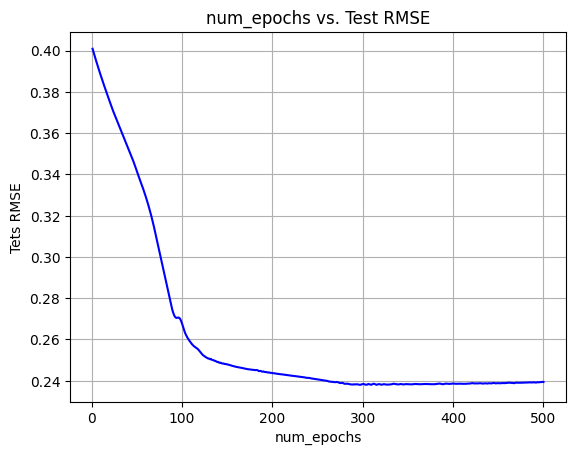

In [28]:
plt.plot(num_epochs_list, rmse_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test RMSE')
plt.xlabel('num_epochs')
plt.ylabel('Tets RMSE') 
plt.grid(True)
plt.show() 

In [29]:
min_rmse = min(rmse_list)
corresponding_r2_score = r2_scores_list[rmse_list.index(min_rmse)]
corresponding_num_epochs = num_epochs_list[rmse_list.index(min_rmse)]

print(f'Min RMSE score: {min_rmse}')
print(f'Corresponding R^2 SCore: {corresponding_r2_score}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Min RMSE score: 0.23804572671255977
Corresponding R^2 SCore: 0.5295255536507832
Corresponding num_epochs: 297


Test R^2 Score vs. num_epochs

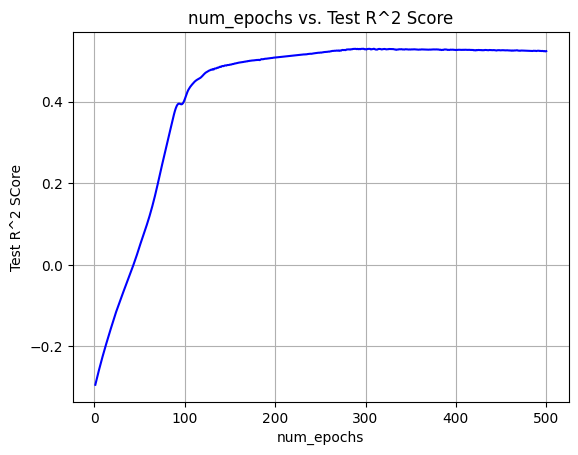

In [30]:
plt.plot(num_epochs_list, r2_scores_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test R^2 Score')
plt.xlabel('num_epochs')
plt.ylabel('Test R^2 SCore') 
plt.grid(True)
plt.show() 

In [31]:
max_r2_score = max(r2_scores_list)
corresponding_rmse = rmse_list[r2_scores_list.index(max_r2_score)]
corresponding_num_epochs = num_epochs_list[r2_scores_list.index(max_r2_score)]

print(f'Max R^2 score: {max_r2_score}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.5295552064893547
Corresponding RMSE: 0.2380996257410104
Corresponding num_epochs: 298


Test Adjusted R^2 Score (Valence) vs. num_epochs

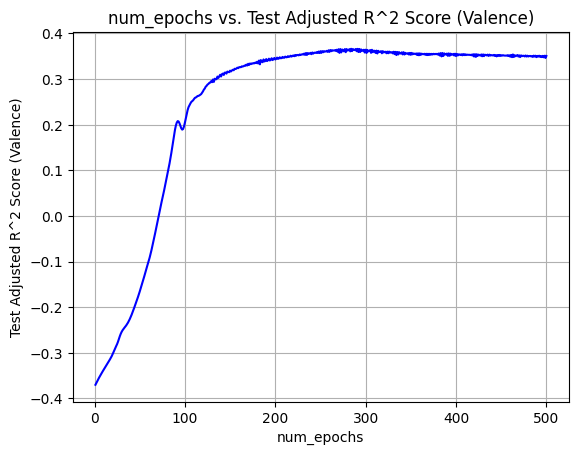

In [32]:
plt.plot(num_epochs_list, adjusted_r2_scores_valence_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Valence)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 Score (Valence)') 
plt.grid(True)
plt.show() 

In [33]:
max_r2_score_valence = max(adjusted_r2_scores_valence_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]

print(f'Max R^2 score: {max_r2_score_valence}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.3664791170276239
Corresponding RMSE: 0.2384591389140819
Corresponding num_epochs: 284


#### Test Adjusted R^2 Score (Arousal) vs. num_epochs

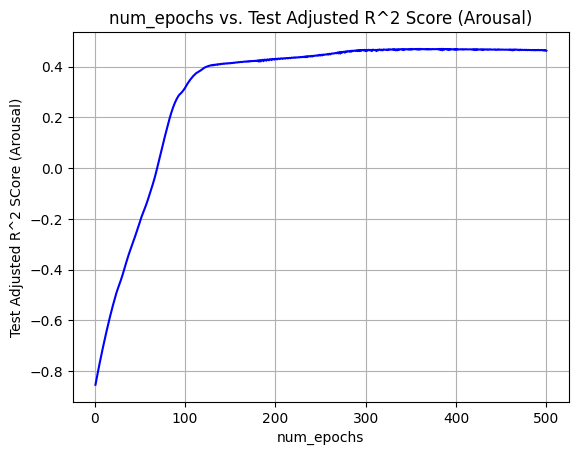

In [34]:
plt.plot(num_epochs_list, adjusted_r2_scores_arousal_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Arousal)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 SCore (Arousal)') 
plt.grid(True)
plt.show() 

In [35]:
max_r2_score_arousal = max(adjusted_r2_scores_arousal_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]

print(f'Max R^2 score: {max_r2_score_arousal}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.47043765827563877
Corresponding RMSE: 0.23861412464180026
Corresponding num_epochs: 384
